In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model


In [43]:
from google.colab import files


uploaded = files.upload()


Saving Weight_Weist.csv to Weight_Weist.csv


In [47]:
data = pd.read_csv('Weight_Weist.csv')

In [48]:
data.shape

(15, 2)

In [49]:
data.head()

,Waist_cm,Weight_kg
0,71,51
1,89,66
2,64,45
3,74,57
4,87,64


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Waist_cm   15 non-null     int64
 1   Weight_kg  15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


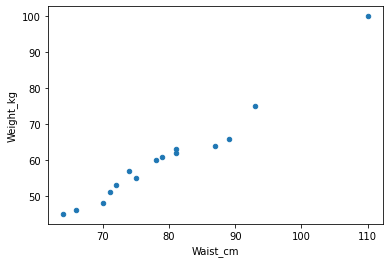

In [51]:
data.plot(kind='scatter',x='Waist_cm',y='Weight_kg')
plt.show()

In [53]:
data.corr() #Corelation Coefficient

,Waist_cm,Weight_kg
Waist_cm,1.000000,0.981216
Weight_kg,0.981216,1.000000


In [54]:
Waist = pd.DataFrame(data['Waist_cm'])
Weight = pd.DataFrame(data['Weight_kg'])

In [55]:
Waist

,Waist_cm
0,71
1,89
2,64
3,74
4,87
5,93
6,79
7,81
8,75
9,72


In [56]:
Weight

,Weight_kg
0,51
1,66
2,45
3,57
4,64
5,75
6,61
7,62
8,55
9,53


In [57]:
lm = linear_model.LinearRegression()
model = lm.fit(Waist,Weight) #prepare the model

In [58]:
model.coef_

array([[1.13470708]])

In [59]:
model.intercept_

array([-29.62009537])

In [61]:
model.score(Waist,Weight) #Evaluate the model


0.9627843958606758

In [74]:
Waist_new = np.array([97])
Waist_new = Waist_new.reshape(-1,1)
Weight_predict = model.predict(Waist_new)
Weight_predict

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[80.44649183]])

In [91]:
#predict new values 
X = ([67,78,97])
X = pd.DataFrame(X)
Y = model.predict(X)
Y = pd.DataFrame(Y)
df=pd.concat([X,Y], axis=1, keys =['Weight', 'Weight_Predicted'])
df

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


,Weight,Weight_Predicted
,0,0
0,67,46.405279
1,78,58.887057
2,97,80.446492


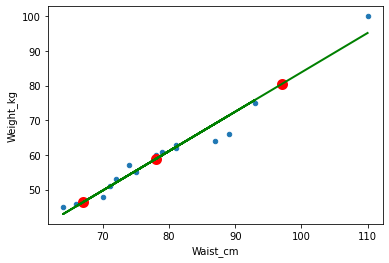

In [99]:
#
data.plot(kind='scatter',x='Waist_cm',y='Weight_kg')
#
plt.plot(Waist,model.predict(Waist),color = 'green',linewidth=2)
plt.scatter(Waist_new, Weight_predict, color ='black')
plt.scatter(X, Y, color ='red',linewidth= 5)
plt.show()